In [1]:
import numpy as np
import pandas as pd
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
df_features = pd.read_csv("features_df.csv")
df_features.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,150,151,152,153,154,155,156,157,158,159
0,0,0.861475,0.922338,0.832785,0.885525,0.828158,0.793287,0.824301,0.732386,0.697710,...,-10.530272,-9.137860,-8.667274,-1.808080,-6.800573,-6.219642,0.257486,1.497342,-3.951734,-2.955382
1,1,0.763870,0.852937,0.828722,0.852716,0.848668,0.843809,0.836646,0.762158,0.727656,...,-14.294190,-15.456995,-9.299699,-3.360145,-3.474428,-0.281338,-4.229411,-1.966500,4.157502,1.135244
2,2,0.939885,0.766322,0.597016,0.664217,0.857982,0.649231,0.633266,0.593182,0.655766,...,-10.398990,-10.941664,-12.466786,-1.782350,-0.597224,-5.187380,-0.188078,2.209370,-5.275289,-4.154563
3,3,0.787585,0.778726,0.755230,0.749415,0.757591,0.876939,0.932356,0.875719,0.791082,...,-9.592726,-3.938925,-5.946343,-3.800183,-0.003994,1.676360,0.155179,0.732040,-5.744483,-1.820551
4,4,0.713702,0.668932,0.653729,0.692693,0.793410,0.953053,0.908813,0.807453,0.712799,...,-10.074761,-4.548989,-6.987258,-1.930489,-0.286458,4.609173,0.296392,0.992723,-5.606578,-5.110719


In [3]:
df_target = pd.read_csv("target_df.csv")
df_target.tail()

,Unnamed: 0,0
4165,4165,normal
4166,4166,normal
4167,4167,normal
4168,4168,normal
4169,4169,normal


In [4]:
df_target["normality"] = df_target.iloc[:, 1].replace(('normal', 'abnormal'), (0, 1))
df_target.head()

,Unnamed: 0,0,normality
0,0,abnormal,1
1,1,abnormal,1
2,2,abnormal,1
3,3,abnormal,1
4,4,abnormal,1


In [5]:
df_target.drop(df_target.columns[0], axis=1 , inplace=True)
df_target.head()

,0,normality
0,abnormal,1
1,abnormal,1
2,abnormal,1
3,abnormal,1
4,abnormal,1


In [6]:
df_features.drop(df_features.columns[0], axis=1 , inplace=True)
df_features.head()

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
0,0.861475,0.922338,0.832785,0.885525,0.828158,0.793287,0.824301,0.732386,0.697710,0.660165,...,-10.530272,-9.137860,-8.667274,-1.808080,-6.800573,-6.219642,0.257486,1.497342,-3.951734,-2.955382
1,0.763870,0.852937,0.828722,0.852716,0.848668,0.843809,0.836646,0.762158,0.727656,0.718589,...,-14.294190,-15.456995,-9.299699,-3.360145,-3.474428,-0.281338,-4.229411,-1.966500,4.157502,1.135244
2,0.939885,0.766322,0.597016,0.664217,0.857982,0.649231,0.633266,0.593182,0.655766,0.763900,...,-10.398990,-10.941664,-12.466786,-1.782350,-0.597224,-5.187380,-0.188078,2.209370,-5.275289,-4.154563
3,0.787585,0.778726,0.755230,0.749415,0.757591,0.876939,0.932356,0.875719,0.791082,0.738816,...,-9.592726,-3.938925,-5.946343,-3.800183,-0.003994,1.676360,0.155179,0.732040,-5.744483,-1.820551
4,0.713702,0.668932,0.653729,0.692693,0.793410,0.953053,0.908813,0.807453,0.712799,0.653515,...,-10.074761,-4.548989,-6.987258,-1.930489,-0.286458,4.609173,0.296392,0.992723,-5.606578,-5.110719


In [7]:
df_features.shape

(4170, 160)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    df_features, 
    df_target["normality"], 
    test_size=0.2, 
    random_state=69
)

In [9]:
from sklearn.ensemble import RandomForestClassifier
####### Default Random Forest ########
model = RandomForestClassifier(
    random_state=69
)

model.fit(X_train, y_train)

print(f'Default Random Forest Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'Default Random Forest Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%\n')


########## Tuned Random Forest #######
model = RandomForestClassifier(
    n_estimators = 500, 
    criterion ='entropy',
    warm_start = True,
    max_features = 'sqrt',
    oob_score = 'True', # more on this below
    random_state=69  
) 

model.fit(X_train, y_train)

print(f'Random Forest Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'Random Forest Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%')

Default Random Forest Model's accuracy on training set is 100.00%
Default Random Forest Model's accuracy on test set is 99.40%

Random Forest Model's accuracy on training set is 100.00%
Random Forest Model's accuracy on test set is 99.52%


In [10]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       723
           1       1.00      0.96      0.98       111

    accuracy                           1.00       834
   macro avg       1.00      0.98      0.99       834
weighted avg       1.00      1.00      1.00       834



In [11]:
from sklearn.metrics import plot_roc_curve

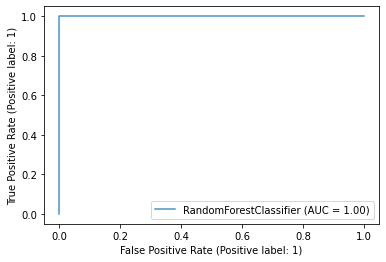

In [14]:
ax = plt.gca()
rfc_disp = plot_roc_curve(model, X_test, y_test, ax=ax, alpha=0.8)

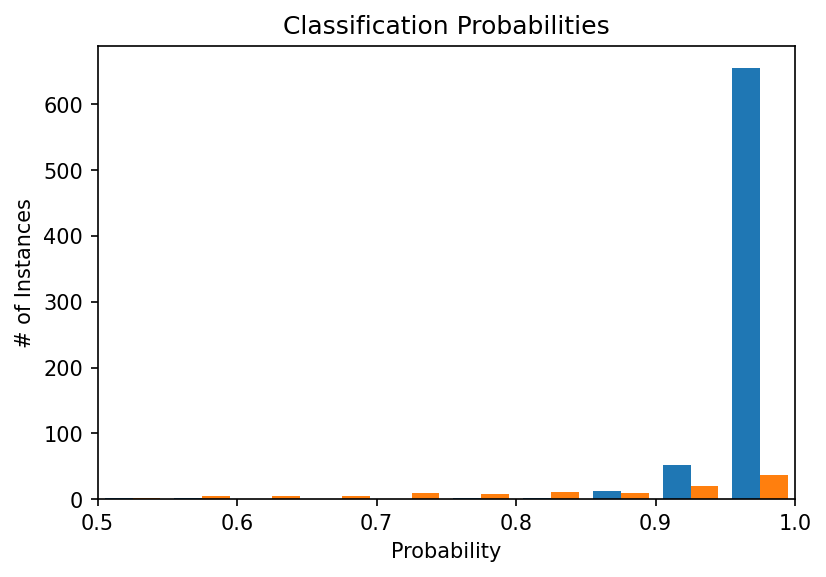

In [17]:
# predict probabilities
probas = model.predict_proba(X_test)

# plot
plt.figure(dpi=150)
plt.hist(probas, bins=20)
plt.title('Classification Probabilities')
plt.xlabel('Probability')
plt.ylabel('# of Instances')
plt.xlim([0.5, 1.0])
plt.show()

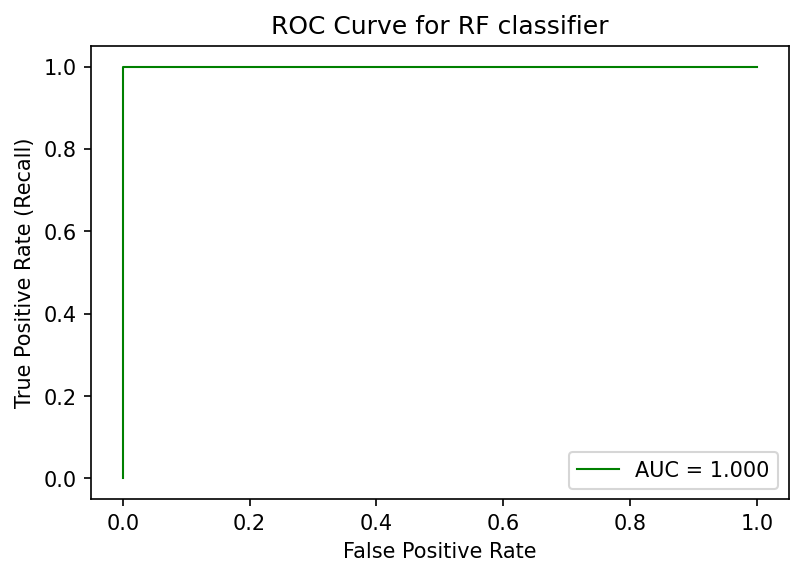

In [18]:
from sklearn.metrics import roc_curve, auc
# get false and true positive rates
fpr, tpr, thresholds = roc_curve(y_test, probas[:,0], pos_label=0)
# get area under the curve
roc_auc = auc(fpr, tpr)
# PLOT ROC curve
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for RF classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

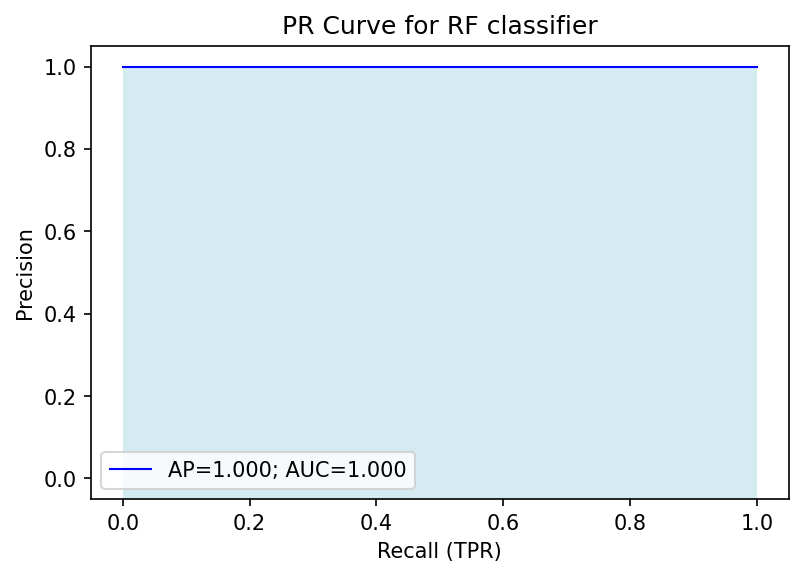

In [19]:
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
# get precision and recall values
precision, recall, thresholds = precision_recall_curve(y_test, probas[:,0], pos_label=0)
# average precision score
avg_precision = average_precision_score(y_test, probas[:,1])
# precision auc
pr_auc = auc(recall, precision)
# plot
plt.figure(dpi=150)
plt.plot(recall, precision, lw=1, color='blue', label=f'AP={avg_precision:.3f}; AUC={pr_auc:.3f}')
plt.fill_between(recall, precision, -1, facecolor='lightblue', alpha=0.5)
plt.title('PR Curve for RF classifier')
plt.xlabel('Recall (TPR)')
plt.ylabel('Precision')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()